# <center>Pandas数据预处理</center>

# 1 学习资料

- **[pandas数据预处理](https://nbviewer.jupyter.org/github/snistty/data_analyst_course/blob/master/04%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86.ipynb)**

# 2 导入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import datetime

# 3 配置matplotlib

In [2]:
# 配置matplotlib页内可视
%matplotlib inline
# 配置matplotlib可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 匹配matplotlib坐标轴可以显示负数
plt.rcParams['axes.unicode_minus'] = False

# 4 数据导入导出

- **常用的数据存储格式：CSV，TXT，EXCEL和数据库。**
- **每种数据存储格式都有对应的导入方法。**

## 4.1 导入前的数据转换工作

**为了使数据中的中文格式出现乱码，可以在进行导入前，将数据转换为UTF-8格式：**
- **使用TXT另存为功能时，在编码格式中选择UTF-8。**
- **使用Notepad++进行编码转换，直接将数据转换为UTF-8格式，然后进行保存。**
- **在完成数据格式转换后，再进行数据导入工作。**

## 4.2 导入CSV文件

**pd.read_csv() 函数进行CSV文件的导入**
  

In [3]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.1/1.csv' )

In [4]:
df

,age,name
0,23,KEN
1,32,John
2,25,JIMI
3,中文,英文


## 4.3 导入文本文件

**pd.read_table() 函数进行文本文件的导入，默认使用首行作为列名，可使用names参数指定列名；使用逗号作为默认分隔符，可以使用sep参数
用正则表达式来进行匹配分隔符，默认解释器的编码格式为utf-8，使用encoding参数指定解释器的编码格式。**

In [5]:
df = pd.read_table('./pandas_data/data_processiing/4/4.1/2.txt', names=['age', 'name'], sep=',', encoding='utf-8')

In [6]:
df

,age,name
0,23,KEN
1,32,John
2,25,JIMI
3,中文,英文


## 4.4 导入Excel文件

**pd.read_excel()函数进行Excel文件导入，使用sheet_name参数指定需要导入的工作表。**

In [7]:
pd.read_excel('./pandas_data/data_processiing/4/4.1/3.xlsx', sheet_name='data')

,age,name
0,23,KEN
1,32,John
2,25,JIMI


## 4.5 数据导出到文件

**使用pd.DataFrame.to_csv()函数，将处理好的数据，导出到CSV文件**

In [8]:
d = {
    'name': ['jhon', 'sala', 'merry'],
    'age': [20, 18, 17]
}
df = pd.DataFrame(data=d)
df

,name,age
0,jhon,20
1,sala,18
2,merry,17


In [9]:
df.to_csv('./pandas_data/data_processiing/4/4.1/test.csv', index=False)

# 5 数据处理

## 5.1 重复值处理

**删除重复值**

In [10]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.3/data.csv')

In [11]:
df

,id,key,value
0,1251147,品牌,Apple
1,1251147,商品名称,苹果iPad mini 3
2,1251147,商品毛重,0.61kg
3,1251147,商品产地,中国
4,1251147,品牌,Apple
5,1251147,商品名称,苹果iPad mini 3
6,1251147,硬盘,128G
7,1251147,尺寸,7.8英寸-9英寸


In [12]:
df[~df.duplicated()]

,id,key,value
0,1251147,品牌,Apple
1,1251147,商品名称,苹果iPad mini 3
2,1251147,商品毛重,0.61kg
3,1251147,商品产地,中国
6,1251147,硬盘,128G
7,1251147,尺寸,7.8英寸-9英寸


In [13]:
df.drop_duplicates()

,id,key,value
0,1251147,品牌,Apple
1,1251147,商品名称,苹果iPad mini 3
2,1251147,商品毛重,0.61kg
3,1251147,商品产地,中国
6,1251147,硬盘,128G
7,1251147,尺寸,7.8英寸-9英寸


## 5.2 缺失值的处理（Nan）

- **删除缺失值，样本数据少时慎用**
- **填充缺失值**
- **不处理，例如单身人士的配偶、未成年人的收入等等**

### 5.2.1 删除缺失数据

In [14]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.4/data.csv')
df

,id,key,value
0,1251147,品牌,Apple
1,1251147,商品名称,苹果iPad mini 3
2,1251147,商品毛重,NaN
3,1251147,NaN,中国
4,1251147,硬盘,128G
5,1251147,尺寸,7.8英寸-9英寸


In [15]:
df.dropna(how='any')

,id,key,value
0,1251147,品牌,Apple
1,1251147,商品名称,苹果iPad mini 3
4,1251147,硬盘,128G
5,1251147,尺寸,7.8英寸-9英寸


### 5.2.2 拉格朗日插值

         2
-0.1111 x + 0.3333 x + 10
2.222222222222223


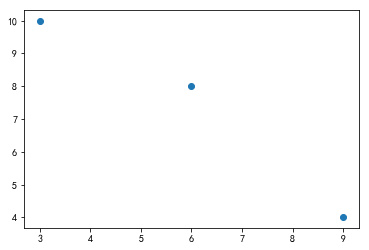

In [16]:
from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]
plt.scatter(x, y)
# lagrange()输出一个多项式的n个系数，y=-0.1111x**2+0.3333x+10
print(lagrange(x, y))
# 根据传入的x&y，插值找到x=10对应的y
print(lagrange(x, y)(10))

## 5.3 空格字符的处理

**处理字符前后的空格**

In [17]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.5/data.csv')
df

,id,name
0,1,KEN
1,2,JIMI
2,3,John


In [18]:
df['name'] = df['name'].str.strip()
df

,id,name
0,1,KEN
1,2,JIMI
2,3,John


## 5.4 提取字段

**提取某列中的字段作为新的列**

In [19]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.6/data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
tel    9 non-null int64
dtypes: int64(1)
memory usage: 152.0 bytes


,tel
0,18922254812
1,13522255003
2,13422259938
3,18822256753
4,18922253721
5,13422259313
6,13822254373
7,13322252452
8,18922257681


**数据类型为int(64)，先转换为字符串类型，再做字段处理**

In [20]:
df = df.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
tel    9 non-null object
dtypes: object(1)
memory usage: 152.0+ bytes


In [21]:
# 运营商
bands = df['tel'].str.slice(0, 3)
bands

0    189
1    135
2    134
3    188
4    189
5    134
6    138
7    133
8    189
Name: tel, dtype: object

In [22]:
# 地区
ares = df['tel'].str.slice(3, 7)
ares

0    2225
1    2225
2    2225
3    2225
4    2225
5    2225
6    2225
7    2225
8    2225
Name: tel, dtype: object

In [23]:
# 号码段
nums = df['tel'].str.slice(7, 11) 
nums

0    4812
1    5003
2    9938
3    6753
4    3721
5    9313
6    4373
7    2452
8    7681
Name: tel, dtype: object

## 5.5 字段拆分

**根据特定分隔符(或者正则表达式)，将字符串进行拆分**

In [24]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.7/data.csv')
df

,name
0,Apple iPad mini MF432CH/A 7.9英寸平板电脑 （16G WiFi版...
1,华为 MediaPad 7Vogue S7-601c（8G) 7英寸通话平板电脑-电信版
2,昂达（ONDA） V975m四核 2G主频最强A9四核 八核GPU 2G内存 16G 204...
3,昂达（ONDA） V975四核 （9.7英寸 A31四核八显 32G 2048*1536视网...
4,华为（HUAWEI） 荣耀X1 7英寸（月光银）3G通话平板 WCDMA/GSM
5,酷比魔方（CUBE） TALK7X四核 7.0英寸平板电脑（MTK8382 IPS全视角屏 ...
6,惠普（HP） Slate 7 3G通话平板（双卡双待7英寸 四核 IPS 超清炫屏 ）
7,酷比魔方（ACUBE) TALK97 9.7英寸平板电脑（MTK8382 IPS大猩猩屏 3...
8,三星（SAMSUNG） GALAXY NotePro P901 12.2寸平板电脑 （双四核...
9,宏碁（acer） P3-131-21292G06as 11.6英寸变形触控本 （奔腾2129...


In [25]:
newdf = df['name'].str.split(' ', 1, True)
newdf.columns = ['band', 'name']
newdf

,band,name
0,Apple,iPad mini MF432CH/A 7.9英寸平板电脑 （16G WiFi版）深空灰定制版
1,华为,MediaPad 7Vogue S7-601c（8G) 7英寸通话平板电脑-电信版
2,昂达（ONDA）,V975m四核 2G主频最强A9四核 八核GPU 2G内存 16G 2048*1536视网膜...
3,昂达（ONDA）,V975四核 （9.7英寸 A31四核八显 32G 2048*1536视网膜屏 前后双置高清...
4,华为（HUAWEI）,荣耀X1 7英寸（月光银）3G通话平板 WCDMA/GSM
5,酷比魔方（CUBE）,TALK7X四核 7.0英寸平板电脑（MTK8382 IPS全视角屏 3G通话 1G/8G ...
6,惠普（HP）,Slate 7 3G通话平板（双卡双待7英寸 四核 IPS 超清炫屏 ）
7,酷比魔方（ACUBE),TALK97 9.7英寸平板电脑（MTK8382 IPS大猩猩屏 3G通话 1G/8G 后置...
8,三星（SAMSUNG）,GALAXY NotePro P901 12.2寸平板电脑 （双四核1.9+1.3GHz 3...
9,宏碁（acer）,P3-131-21292G06as 11.6英寸变形触控本 （奔腾2129Y 2G 60GS...


## 5.6 记录抽取

**根据布尔类型的索引，来进行记录的抽取**
- **比较运算（> < >= <= !=）**
- **范围运算（contains）**
- **空值匹配（pd.isnull())**
- **逻辑运算（& | not）**

In [26]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.8/data.csv', sep='|')
df

,id,comments,title
0,1197453,10071,华为（HUAWEI）荣耀平板 Wifi版 8英寸平板电脑（高通骁龙四核 1280×800 1...
1,1192330,6879,小米（MI）7.9英寸平板 WIFI 64GB（NVIDIA Tegra K1 2.2GHz...
2,1225995,2218,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
3,1308557,1605,华为（HUAWEI）荣耀平板优享版 Wifi 8英寸平板电脑（高通骁龙 64位四核1280×...
4,1185287,836,微软（Microsoft） Surface Pro 3（中文版 Intel i5 128G存...
5,1197789,2084,NaN
6,996957,11123,Apple iPad Air MD785CH 9.7英寸平板电脑 （16G WiFi版）深空灰色
7,1150612,5857,台电（Teclast） P98 3G八核 9.7英寸平板电脑(MTK8392 Air视网膜屏...
8,1285329,2482,台电（Teclast）X98 Air 3G 双系统版 9.7英寸平板电脑(正版Win8+安卓...


In [27]:
# 提取品论数大于10000的记录
df[df.comments>10000]

,id,comments,title
0,1197453,10071,华为（HUAWEI）荣耀平板 Wifi版 8英寸平板电脑（高通骁龙四核 1280×800 1...
6,996957,11123,Apple iPad Air MD785CH 9.7英寸平板电脑 （16G WiFi版）深空灰色


In [28]:
# 提取评论数在1000和10000之间的记录
df[df.comments.between(1000, 10000)]

,id,comments,title
1,1192330,6879,小米（MI）7.9英寸平板 WIFI 64GB（NVIDIA Tegra K1 2.2GHz...
2,1225995,2218,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
3,1308557,1605,华为（HUAWEI）荣耀平板优享版 Wifi 8英寸平板电脑（高通骁龙 64位四核1280×...
5,1197789,2084,NaN
7,1150612,5857,台电（Teclast） P98 3G八核 9.7英寸平板电脑(MTK8392 Air视网膜屏...
8,1285329,2482,台电（Teclast）X98 Air 3G 双系统版 9.7英寸平板电脑(正版Win8+安卓...


In [29]:
# 上述逻辑也可用逻辑表达式
df[(df.comments>=1000) & (df.comments<=10000)]

,id,comments,title
1,1192330,6879,小米（MI）7.9英寸平板 WIFI 64GB（NVIDIA Tegra K1 2.2GHz...
2,1225995,2218,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
3,1308557,1605,华为（HUAWEI）荣耀平板优享版 Wifi 8英寸平板电脑（高通骁龙 64位四核1280×...
5,1197789,2084,NaN
7,1150612,5857,台电（Teclast） P98 3G八核 9.7英寸平板电脑(MTK8392 Air视网膜屏...
8,1285329,2482,台电（Teclast）X98 Air 3G 双系统版 9.7英寸平板电脑(正版Win8+安卓...


In [30]:
# 提取标题为空的记录
df[pd.isnull(df.title)]

,id,comments,title
5,1197789,2084,NaN


In [31]:
# 提取标题中包含“台电”的记录
df[df.title.str.contains('台电', na=False)]

,id,comments,title
7,1150612,5857,台电（Teclast） P98 3G八核 9.7英寸平板电脑(MTK8392 Air视网膜屏...
8,1285329,2482,台电（Teclast）X98 Air 3G 双系统版 9.7英寸平板电脑(正版Win8+安卓...


## 5.7 随机抽样

**使用numpy.random.randint(start, end, num)函数进行随机抽样**

In [32]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.9/data.csv')
df

,num
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [33]:
# 从0到9中随机抽取三个数字
ran = np.random.randint(0, 10, 3)
df.loc[ran, :]

,num
8,90
1,20
4,50


## 5.8 记录合并（纵向）

**多张表格进行追加合并**

In [34]:
df1 = pd.read_csv('./pandas_data/data_processiing/4/4.10/data1.csv', sep='|')
df2 = pd.read_csv('./pandas_data/data_processiing/4/4.10/data2.csv', sep='|')
df3 = pd.read_csv('./pandas_data/data_processiing/4/4.10/data3.csv', sep='|')

In [35]:
df1.head(1)

,id,comments,title
0,1235465,3256,台电（Teclast）X98 Air Ⅱ 9.7英寸平板电脑 (Intel 3736F 2....


In [36]:
df2.head(1)

,id,comments,title
0,1134006,13231,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...


In [37]:
df3.head(1)

,id,comments,title
0,996961,62014,Apple iPad Air MD788CH 9.7英寸平板电脑 （16G WiFi版）银色


In [38]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,id,comments,title
0,1235465,3256,台电（Teclast）X98 Air Ⅱ 9.7英寸平板电脑 (Intel 3736F 2....
1,1312660,342,台电（Teclast）X10HD 3G 双系统 10.1英寸平板电脑(Win8+安卓 256...
2,1192758,1725,台电（Teclast）P98 Air八核 9.7英寸平板电脑 (A80T八核 Air视网膜屏...
3,1312671,279,台电（Teclast）X89 双系统版 7.9英寸平板电脑 (IntelZ3735 分辨率2...
4,1094550,2563,台电（Teclast） P19HD 10.1英寸平板电脑(Intel Z2580 2.0G主...
5,1327452,207,台电（Teclast）P80 3G八核 8英寸平板电脑(3G通话 MT8392八核 128...
6,1134006,13231,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
7,1192330,6879,小米（MI）7.9英寸平板 WIFI 64GB（NVIDIA Tegra K1 2.2GHz...
8,1225995,2218,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
9,1225988,1336,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...


## 5.9 字段匹配

**使用基于索引的merge()函数，进行两张表的记录合并**

In [39]:
items = pd.read_csv('./pandas_data/data_processiing/4/4.12/data1.csv', sep='|', names=['id', 'comments', 'title'])
items

,id,comments,title
0,996955,2412,Apple iPad Air MD786CH/A 9.7英寸平板电脑 （32G WiFi版）...
1,1251208,2061,Apple iPad Air 2 MGKM2CH/A 9.7英寸平板电脑 （64G WiFi...
2,1197453,10071,华为（HUAWEI）荣耀平板 Wifi版 8英寸平板电脑（高通骁龙四核 1280×800 1...
3,1192330,6879,小米（MI）7.9英寸平板 WIFI 64GB（NVIDIA Tegra K1 2.2GHz...
4,1225995,2218,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
5,1308557,1605,华为（HUAWEI）荣耀平板优享版 Wifi 8英寸平板电脑（高通骁龙 64位四核1280×...
6,1185287,836,微软（Microsoft） Surface Pro 3（中文版 Intel i5 128G存...
7,1197789,2084,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...
8,996957,11123,Apple iPad Air MD785CH 9.7英寸平板电脑 （16G WiFi版）深空灰色
9,1150612,5857,台电（Teclast） P98 3G八核 9.7英寸平板电脑(MTK8392 Air视网膜屏...


In [40]:
price = pd.read_csv('./pandas_data/data_processiing/4/4.12/data2.csv', sep='|', names=['id', 'oldPrice', 'newPrice'])
price

,id,oldPrice,newPrice
0,996955,3099,4299
1,1251208,4288,4289
2,1197453,799,1000
3,1192330,1699,1799
4,1225995,1299,1599
5,1308557,999,1099
6,1185287,7388,7588
7,1197789,1299,1500
8,996957,2788,2899
9,1150612,999,1499


In [41]:
pd.merge(items, price, left_on='id', right_on='id')

,id,comments,title,oldPrice,newPrice
0,996955,2412,Apple iPad Air MD786CH/A 9.7英寸平板电脑 （32G WiFi版）...,3099,4299
1,1251208,2061,Apple iPad Air 2 MGKM2CH/A 9.7英寸平板电脑 （64G WiFi...,4288,4289
2,1197453,10071,华为（HUAWEI）荣耀平板 Wifi版 8英寸平板电脑（高通骁龙四核 1280×800 1...,799,1000
3,1192330,6879,小米（MI）7.9英寸平板 WIFI 64GB（NVIDIA Tegra K1 2.2GHz...,1699,1799
4,1225995,2218,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...,1299,1599
5,1308557,1605,华为（HUAWEI）荣耀平板优享版 Wifi 8英寸平板电脑（高通骁龙 64位四核1280×...,999,1099
6,1185287,836,微软（Microsoft） Surface Pro 3（中文版 Intel i5 128G存...,7388,7588
7,1197789,2084,小米（MI）7.9英寸平板 WIFI 16GB（NVIDIA Tegra K1 2.2GHz...,1299,1500
8,996957,11123,Apple iPad Air MD785CH 9.7英寸平板电脑 （16G WiFi版）深空灰色,2788,2899
9,1150612,5857,台电（Teclast） P98 3G八核 9.7英寸平板电脑(MTK8392 Air视网膜屏...,999,1499


## 5.10 字段合并

**字段拆分的逆过程**

In [42]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.11/data.csv', sep=' ', names=['band', 'ares', 'nums'])
df.head()

,band,ares,nums
0,189,2225,4812
1,135,2225,5003
2,134,2225,9938
3,188,2225,6753
4,189,2225,3721


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
band    9 non-null int64
ares    9 non-null int64
nums    9 non-null int64
dtypes: int64(3)
memory usage: 296.0 bytes


In [44]:
df = df.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
band    9 non-null object
ares    9 non-null object
nums    9 non-null object
dtypes: object(3)
memory usage: 296.0+ bytes


In [45]:
df['number'] = df['band'] + df['ares'] + df['nums']

In [46]:
df

,band,ares,nums,number
0,189,2225,4812,18922254812
1,135,2225,5003,13522255003
2,134,2225,9938,13422259938
3,188,2225,6753,18822256753
4,189,2225,3721,18922253721
5,134,2225,9313,13422259313
6,138,2225,4373,13822254373
7,133,2225,2452,13322252452
8,189,2225,7681,18922257681


## 5.11 数据标准化

**将数据按照一定的比例进行缩放，使之落入指定区间，以便消除单位，方便比较：**
- **0-1标准化：$X^* =\frac{x - min}{max - min}$**
- **z-score标准化：$X^* = \frac{x - \mu}{\sigma}$**

In [47]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.14/data.csv')
df.head()

,class,name,score
0,一班,朱志斌,120
1,一班,朱凤,122
2,一班,郑丽萍,140
3,一班,郭杰明,131
4,一班,许杰,122


In [48]:
# 将分数进行标准化
result = (df.score - df.score.min()) / (df.score.max() - df.score.min())
df['result'] = result
df

,class,name,score,result
0,一班,朱志斌,120,0.545455
1,一班,朱凤,122,0.590909
2,一班,郑丽萍,140,1.000000
3,一班,郭杰明,131,0.795455
4,一班,许杰,122,0.590909
5,二班,郑芬,119,0.522727
6,二班,林龙,96,0.000000
7,二班,林良坤,135,0.886364
8,二班,黄志红,105,0.204545
9,三班,方小明,114,0.409091


## 5.12 数据分组

**使用pandas.cut()函数进行数据等距或者自定义间距分组**

In [49]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.15/data.csv', sep='|')
df.head()

,tel,cost
0,166424556600,2.0
1,166424557199,5.0
2,166424561768,75.3
3,166424569696,20.0
4,166424569924,97.3


In [50]:
bins = [min(df.cost)-1, 20, 40, 60, 80, 100, max(df.cost)+1]
labels = ['20以下', '20-40', '40-60', '60-80', '80-100', '100以上']

In [51]:
pd.cut(df.cost, bins=bins, right=True, labels=labels)

0       20以下
1       20以下
2      60-80
3       20以下
4     80-100
5       20以下
6     80-100
7      60-80
8       20以下
9      40-60
10     20-40
11      20以下
12     60-80
13    80-100
14      20以下
Name: cost, dtype: category
Categories (6, object): [20以下 < 20-40 < 40-60 < 60-80 < 80-100 < 100以上]

## 5.13 时间格式转换

In [52]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.16/data.csv')
df.head()

,电话,注册时间,是否微信
0,166412894295,2011/1/1,否
1,166416795207,2011/1/1,否
2,166423353436,2011/1/1,是
3,166424978309,2011/1/1,是
4,166450811715,2011/1/1,否


In [53]:
df['格式化日期'] = pd.to_datetime(df.注册时间, format='%Y/%m/%d')
df.head()

,电话,注册时间,是否微信,格式化日期
0,166412894295,2011/1/1,否,2011-01-01
1,166416795207,2011/1/1,否,2011-01-01
2,166423353436,2011/1/1,是,2011-01-01
3,166424978309,2011/1/1,是,2011-01-01
4,166450811715,2011/1/1,否,2011-01-01


## 5.14 日期格式化

In [54]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.17/data.csv')
df.head()

,电话,注册时间,是否微信
0,166412894295,2011/1/1,否
1,166416795207,2011/1/1,否
2,166423353436,2011/1/1,是
3,166424978309,2011/1/1,是
4,166450811715,2011/1/1,否


In [55]:
df_dt = pd.to_datetime(df.注册时间, format='%Y/%m/%d')
df_dt.head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: 注册时间, dtype: datetime64[ns]

In [56]:
df_dt_str = df_dt.apply(lambda x: x.strftime('%d-%m-%Y'))
df_dt_str.head()

0    01-01-2011
1    01-01-2011
2    01-01-2011
3    01-01-2011
4    01-01-2011
Name: 注册时间, dtype: object

## 5.15 时间抽取

In [57]:
df = pd.read_csv('./pandas_data/data_processiing/4/4.18/data.csv')
df.head()

,电话,注册时间,是否微信
0,166412894295,2011/1/1,否
1,166416795207,2011/1/1,否
2,166423353436,2011/1/1,是
3,166424978309,2011/1/1,是
4,166450811715,2011/1/1,否


In [58]:
df_dt = pd.to_datetime(df.注册时间, format='%Y/%m/%d')
df_dt.head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: 注册时间, dtype: datetime64[ns]

In [59]:
df_dt.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: 注册时间, dtype: int64